<a href="https://colab.research.google.com/github/tuxsy/iebs-master-data-science/blob/main/m04/taller-matplotlib/CuadernoMatplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IEBS

## Generación modular de gráficos con matplotlib en Python

<div style="text-align: right">
<font size=4>
Javier Cózar del Olmo
</font>
</div>

---

<a id="indice"></a>
<h2><font color="#000000" size=5>Índice</font></h2>


* [1. Conceptos básicos](#section1)
* [2. Datos](#section2)
* [3. Formato de los datos de entrada](#section3)
* [4. Tipos de gráficos](#section4)
    * [plot](#section4.1)
    * [stackplot](#section4.2)
    * [bar](#section4.3)
    * [hist](#section4.4)
    * [boxplot](#section4.5)
    * [pie](#section4.6)
    * [text](#section4.7)
    * [annotate](#section4.8)
    * [hlines y vlines](#section4.9)
* [5. Títulos y etiquetas](#section5)
* [6. Ejes](#section6)
* [7. Leyenda](#section7)
* [8. Estilos](#section8)
* [9. Múltiples gráficos en una figura](#section9)

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>

<a id="section1"></a>


## Conceptos básicos


### Backend

Aunque no vamos a utilizar la interfaz de backend para la generación de gráficos, es necesario saber mínimamente qué es y cómo se configura.

El backend es el encargado de transformar la figura de matplotlib en un gráfico que podamos visualizar. _Matplotlib_ puede ser utilizado para la generación de gráficos en varios contextos: de manera independiente, en aplicaciones _tk_ o _qt_, en _notebooks_, en archivos de imagen, etc. Debido a que el proceso de renderización depende del contexto, es necesario un _backend_ específico para cada uno de ellos.  La siguiente línea muestra los _backends_ disponibles.

In [1]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


En el caso de las libretas _Jupyter_, se trabaja con dos _backends_ distintos: `inline` y `notebook`. El primero de ellos muestra los gráficos como imágenes estáticas, y es usado frecuentemente cuando las libretas se utilizan como informe (es el usado en los ejemplos anteriores). El segundo permite cierto nivel de interactividad, es más flexible, y es más indicado cuando se han de hacer modificaciones sobre un mismo gráfico de manera progresiva. 

En _Python_, la elección del _backend_ se hace mediante la función `matplotlib.use(nombre_backend)`. En Jupyter, la elección de un _backend_ se puede hacer mediante un _magic_. 

In [22]:
%matplotlib inline
# %matplotlib notebook

### Scripting


El módulo principal de esta capa es `matplotlib.pyplot`. Proporciona una interfaz, parecida a la de otras herramientas como _Matlab_, que permite elaborar las gráficas directamente y, sobre todo (por la dificultad que esto conlleva) gestionar la creación de figuras y el _backend_  ([documentación](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)). 

La siguiente celda importa este módulo, usualmente renombrado a `plt`.

In [19]:
import matplotlib.pyplot as plt

Vamos a utilizar la interfaz de _scripting_ de _matplotlib_. Eso significa que al ejecutar ciertas operaciones construirá y enriquecerá el gráfico _actual_.


Un gráfico se crea ejecutando el comando `plt.figure()`, y a partir de ahí todos los comandos hacen referencia a esa figura, hasta que se construya otra figura diferente.

La siguiente celda de código construye una gráfica sencilla y le asigna un título.

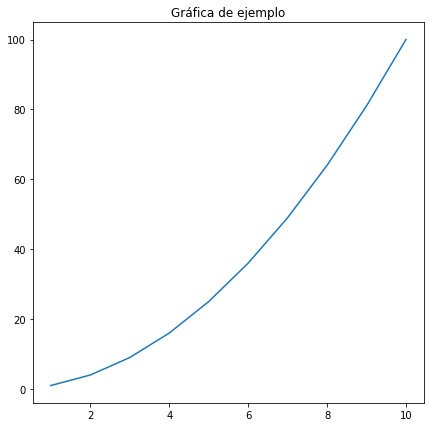

In [23]:
# Construimos los datos
x_data = [1,2,3,4,5,6,7,8,9,10]
y_data = [x ** 2 for x in x_data]

# Y creamos la figura
fig = plt.figure(figsize=(7,7))
plt.plot(x_data, y_data)
plt.title("Gráfica de ejemplo")
pass

La llamada a estas funciones nos devuelven objetos de la figura o dentro de ella. Estos objetos pueden ser usados a través de la API de _Artist_, o como argumentos por otras funciones.

Por ejemplo, si usamos el _backend notebook_, es necesario que cerremos la figura para que deje de consumir recursos (y "terminar" esa interactividad). Existe una función expuesta en `matplotlib.pyplot` para cerrar una figura abierta:

In [24]:
plt.close(fig)

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>

<a id="section2"></a>

## Datos - mtcars

Vamos a trabajar con este conjunto de datos. Está formado por 32 instancias que contienen datos sobre el consumo de combustible y 10 características de coches publicados en la revista Motor Trend US magazine en 1974. La variable **mpg** es la que indica el consumo de combustible (en millas por galón). Las características de cada coche son medidas en las siguientes variables:

- **cyl**: Número de cilindros
- **disp**: Cilindrada en cc
- **hp**: Potencia en C.V.
- **drat**: Ratio eje trasero
- **wt**: Peso en libras
- **qsec**: Tiempo (segundos) en recorrer 1/4 de milla
- **vs**: Tipo de motor (0 = V-shaped, 1 = straight)
- **am**:	Transmisión (0 = automático, 1 = manual)
- **gear**: Número de marchas (sin contar marcha atrás)
- **carb**: Número de carburadores

In [25]:
# Usaremos pandas para cargar los datos
import pandas as pd

# cargamos mtcars
mtcars = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv")
# renombramos la primera columna a model
mtcars.rename({'Unnamed: 0': 'model'}, axis=1, inplace=True)
# creamos una nueva columna llamada brand (la marca del coche)
mtcars['brand'] = mtcars['model'].str.extract(r'(\w+)')
# y creamos las variables am y vs como categóricas
mtcars['am'] = pd.Categorical(mtcars['am']).rename_categories({0: 'automatic', 1: 'manual'})
mtcars['vs'] = pd.Categorical(mtcars['vs']).rename_categories({0: 'V-shaped', 1: 'straight'})

In [26]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V-shaped,manual,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V-shaped,manual,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,straight,manual,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,straight,automatic,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V-shaped,automatic,3,2,Hornet


<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>

<a id="section3"></a>

## Formato de los datos de entrada

Los datos pueden ser proporcionados en varios formatos:

- Colecciones estándar de _Python_ (tuplas, listas)
- Arrays _Numpy_
- _Series_ y _DataFrames_ de _Pandas_

Todos son equivalentes, y no tienen una distinción especial en cuanto a la apariencia. Son puramente datos. Por ejemplo, si pasamos un _DataFrame_ de _Pandas_ con 100 filas, 3 columnas y un índice a

```
plt.plot(df)
```

es equivalente a:

```
plt.plot(df.index, df.col1, df.index, df.col2, df.index, df.col3)
```

Además, `pyplot` permite  trabajar con otros tipos de datos, como por ejemplo `datetime`. Por último, el manejo de las colecciones y tipos de datos es relativamente transparante, por lo que no hay que llevar a cabo ninguna conversión explícita.

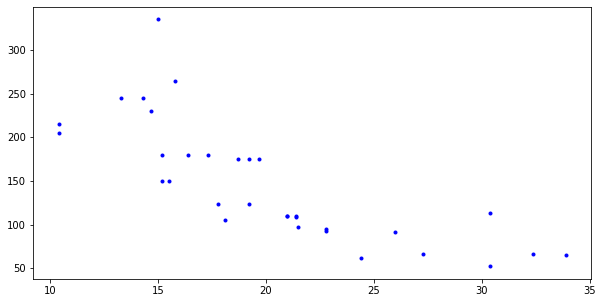

In [ ]:
df_plot = mtcars.set_index("mpg")[["hp"]]

fig = plt.figure(figsize=(10,5))
plt.plot(df_plot, ".b")
pass

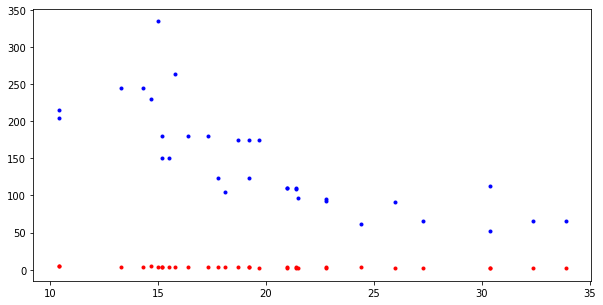

In [ ]:
df_plot = mtcars.set_index("mpg")[["hp", "wt"]]
x = df_plot.index
y1 = df_plot.hp
y2 = df_plot.wt

fig = plt.figure(figsize=(10,5))
plt.plot(x, y1, ".b", x, y2, ".r")
pass

Si las series de datos que queremos mostrar tienen diferente dominio podemos usar un eje secundario. Estas gráficas son complejas de interpretar por lo que deben ser usadas con cautela.

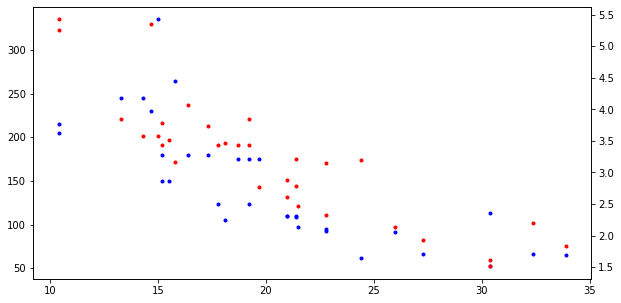

In [ ]:
df_plot = mtcars.set_index("mpg")[["hp", "wt"]]
x = df_plot.index
y1 = df_plot.hp
y2 = df_plot.wt

fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

ax1.plot(x, y1, ".b")
ax2.plot(x, y2, ".r")
pass

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>

<a id="section4"></a>

## Tipos de gráficos

`matplotlib.pyplot` incluye una serie de funciones para generar gráficos, accesibles a través de diferentes funciones. A continuación veremos las más utilizadas, así como los parámetros más útiles.

<a id="section4.1"></a>

### plt.plot

Esta función genera un gráfico enfrentando los valores en el eje _y_ contra los valores en el eje _x_. Sirve para generar gráficas de líneas y de nubes de puntos.

In [ ]:
fig = plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

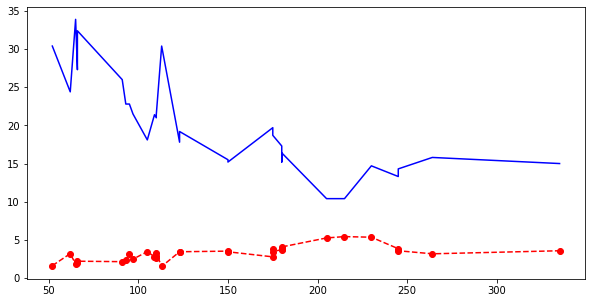

In [ ]:
# necesitamos ordenar, ya que maplotlib está centrado en los valores y depende del orden de las secuencias
df = mtcars.sort_values("hp")

fig = plt.figure(figsize=(10,5))
gr = plt.plot(df.hp, df.mpg, 'b', df.hp, df.wt, 'o--r')
pass

## Format strings

La forma más compacta de especificaf el formato de una serie de datos dentro de una figura es usando los _format strings_. Éstos son strings que contienen 3 partes bien diferenciadas ([link oficial](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html)):

```
fmt = '[marker][line][color]'
```

donde _marker_ se refiere al tipo de elemento que se usa para dibujar cada elemento (dato), _line_ si se dibuja una línea entre elementos, y _color_ el color de los mismos. Todos ellos son opcionales.


### Markers

| character | description           |
|-----------|-----------------------|
| .         | point marker          |
| ,         | pixel marker          |
| o         | circle marker         |
| v         | triangle_down marker  |
| ^         | triangle_up marker    |
| <         | triangle_left marker  |
| >         | triangle_right marker |
| 1         | tri_down marker       |
| 2         | tri_up marker         |
| 3         | tri_left marker       |
| 4         | tri_right marker      |
| s         | square marker         |
| p         | pentagon marker       |
| *         | star marker           |
| h         | hexagon1 marker       |
| H         | hexagon2 marker       |
| +         | plus marker           |
| x         | x marker              |
| D         | diamond marker        |
| d         | thin_diamond marker   |
| |         | vline marker          |
| _         | hline marker          |


### Line Styles

| character | description         |
|-----------|---------------------|
| -         | solid line style    |
| --        | dashed line style   |
| -.        | dash-dot line style |
| :         | dotted line style   |

### Colors

| character | color   |
|-----------|---------|
| b         | blue    |
| g         | green   |
| r         | red     |
| c         | cyan    |
| m         | magenta |
| y         | yellow  |
| k         | black   |
| w         | white   |


Además de la ventaja de codificar en un solo parámetro la forma del marcador, el tipo de línea y el color, las funciones permiten pasar de forma posicional este argumento junto con los datos de cada serie.

En la siguiente celda vamos a construir una gráfica `plt.plot` con dos series de datos. La primera será una línea continua azul, y la segunda una línea discontinua roja en la que los datos vienen marcados con _x_.

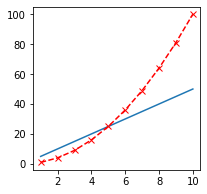

In [ ]:
# Construimos los datos
x_data = [1,2,3,4,5,6,7,8,9,10]
y1_data = [x * 5 for x in x_data]
y2_data = [x ** 2 for x in x_data]

# Y creamos la figura
fig = plt.figure(figsize=(3,3))
plt.plot(x_data, y1_data, "-")
plt.plot(x_data, y2_data, "x--r")
pass

También podemos, por ejemplo, dibujar los puntos de diferente color en función del valor de una variable. Esto se consigue imprimiéndolos en diferentes series de valores.

In [ ]:
mtcars.am.cat.categories

Index(['automatic', 'manual'], dtype='object')

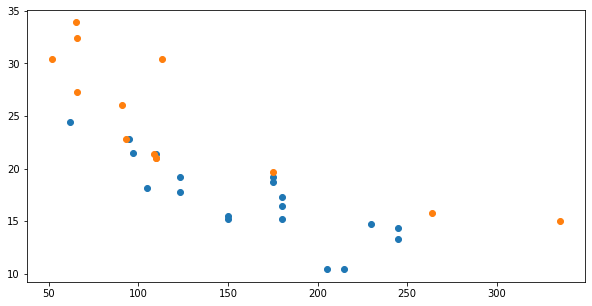

In [ ]:
fig = plt.figure(figsize=(10,5))
for c in mtcars.am.cat.categories:
    df = mtcars.loc[lambda df: df.am == c]
    plt.plot(df.hp, df.mpg, 'o')
pass

Por el contrario, una de las desventajas es que no nos permite separar la definición de cada uno de estos elementos por serie de datos, es decir, no permite dibujar una línea negra en la que los marcadores sean puntos rojos.

En este caso, no queda más remedio que editar los argumentos del tipo de gráfico en concreto: [Line2D](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)

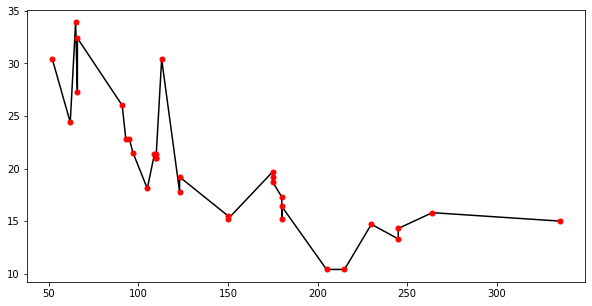

In [ ]:
# Y creamos la figura
fig = plt.figure(figsize=(10,5))
df = mtcars.sort_values("hp")
plt.plot(df.hp, df.mpg, ".-k", markerfacecolor='#FF0000', markeredgecolor='red', markersize=10);

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>
<a id="section4.2"></a>

### stackplot

Los gráficos de pila permiten representar la relacion y suma de varias series. En _Matplotlib_ se construyen mediante la función `pyplot.stackplot()`. Si el eje X es una variable discreta, da la misma información visual que los stacked bars. Si el eje X es una variable continua (por ejemplo, una variable temporal) los stackplots son la opción adecuada.

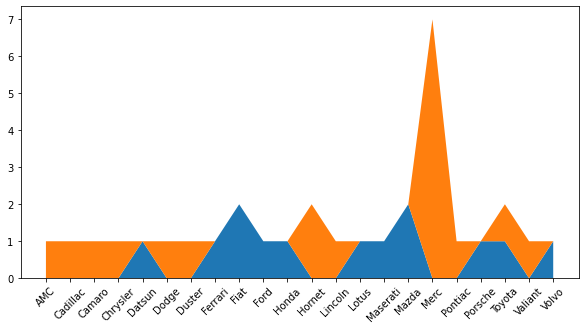

In [ ]:
df = (
    mtcars
    .assign(n=1)
    [['brand', 'am', 'n']]
    .pivot_table(
        values="n",
        index='brand',
        columns='am',
        aggfunc="sum",
        fill_value=0
    )
)

fig = plt.figure(figsize=(10,5))

plt.stackplot(df.index, df.manual, df.automatic)
# Veremos mas adelante el significado de esta función
plt.xticks(rotation=45);

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>
<a id="section4.3"></a>

### Bar

Son gráficos que se utilizan para mostrar como alguna cantidad varía entre un conjunto pequeño de elementos (valores discretos). Se dibujan con la función `pyplot.bar()`. El primer argumento debe ser una secuencia de labels (texto) o enteros, y el segundo un número indicando la altura de cada barra.

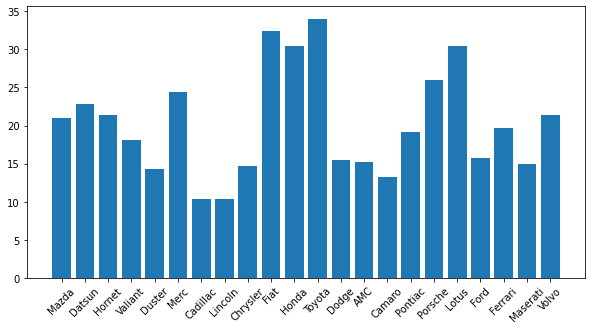

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.bar(mtcars.brand, mtcars.mpg)
plt.xticks(rotation=45);

Podemos editar el aspecto de las barras con los argumentos descritos en la [documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html).

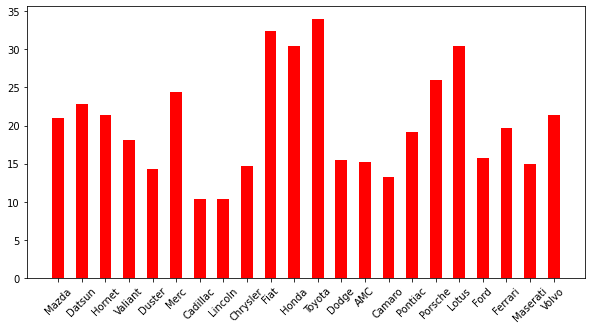

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.bar(mtcars.brand, mtcars.mpg, color="r", width=0.5)
plt.xticks(rotation=45);

Si ponemos dos series, se imprimen en sucesión una detrás de otra.

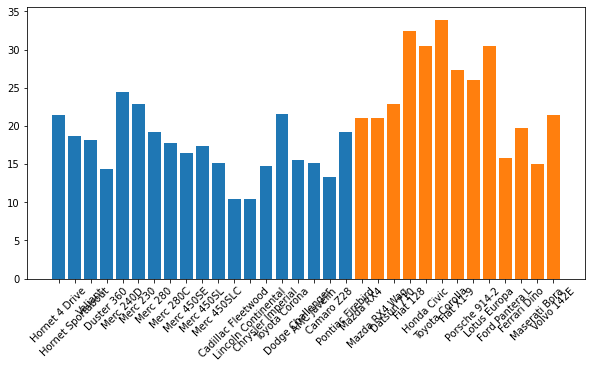

In [ ]:
fig = plt.figure(figsize=(10,5))
for c in mtcars.am.cat.categories:
    df = mtcars.loc[lambda df: df.am == c]
    plt.bar(df.model, df.mpg)
plt.xticks(rotation=45);

Si lo que queremos es intercalarlas, tenemos que controlar la posición con el primer argumento. Como debe ser un entero, debemos usar la función `xticks` (la describiremos más adelante) para mostrar los textos.

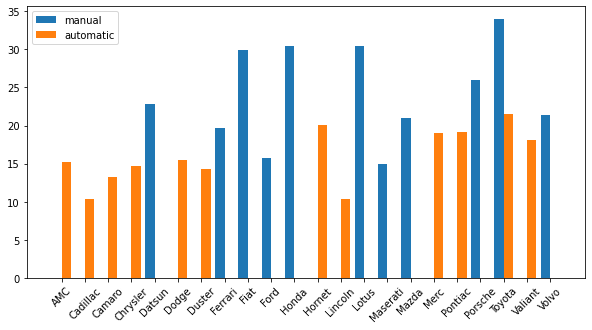

In [ ]:
import numpy as np

df = (
    mtcars
    [["brand", "mpg", "am"]]
    .pivot_table(values="mpg", index='brand', columns='am',aggfunc="mean", fill_value=0)
)

barwidth = 0.4

indices = np.arange(len(df.index))

fig = plt.figure(figsize=(10,5))

plt.bar(indices - 0.2, df.manual, width=barwidth, label="manual")
plt.bar(indices + 0.2, df.automatic, width=barwidth, label="automatic")

plt.xticks(indices, df.index, rotation=45)
# más adelante se explicará la función legened
plt.legend();

Finalmente, existe una función idéntica llamada `plt.barh` que dibuja las columnas en horizontal.

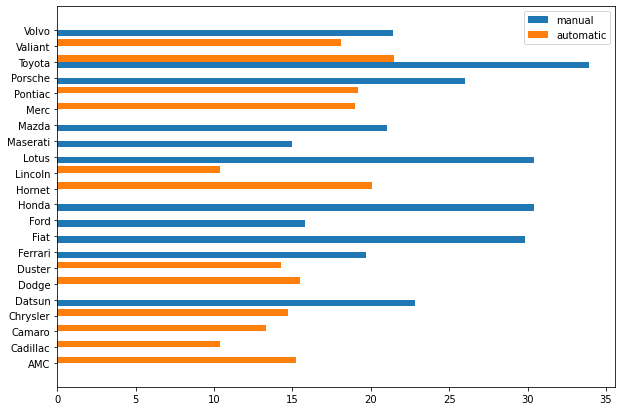

In [ ]:
df = (
    mtcars
    [["brand", "mpg", "am"]]
    .pivot_table(values="mpg", index='brand', columns='am',aggfunc="mean", fill_value=0)
)

barheight = 0.4

indices = np.arange(len(df.index))

fig = plt.figure(figsize=(10,7))

plt.barh(indices - 0.2, df.manual, height=barheight, label="manual")
plt.barh(indices + 0.2, df.automatic, height=barheight, label="automatic")

# más adelante se explicarán las funciones xticks, yticks y legend
plt.yticks(indices, df.index)
plt.legend();

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>
<a id="section4.4"></a>

### hist

La función `pyplot.hist()` construye un histograma a partir de un conjunto de datos con el número de bins especificado. Este histograma puede representar en el eje y las frecuencias absolutas, o las relativas. En este caso, con el parámetro `density=True` se indica que se utilicen las frecuencias relativas.

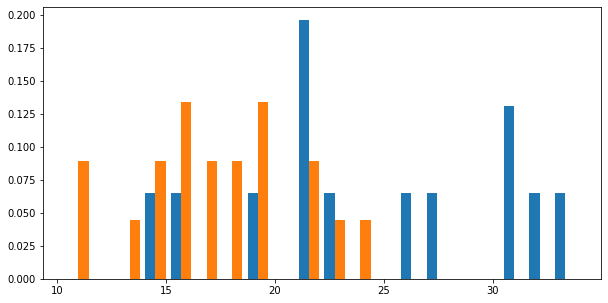

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.hist(
    [mtcars.loc[lambda df: df.am == "manual"].mpg, mtcars.loc[lambda df: df.am == "automatic"].mpg],
    stacked=False, density=True, bins=20
);

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>
<a id="section4.5"></a>

### Boxplot

Se pueden crear con `pyplot.boxplot`. Representa la distribución de la. Es posible cambiar el aspecto de las distintas componentes de las cajas, pero esto requiere acceder directamente a ellas.

Se pueden consultar diferentes parametros en la [documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html).

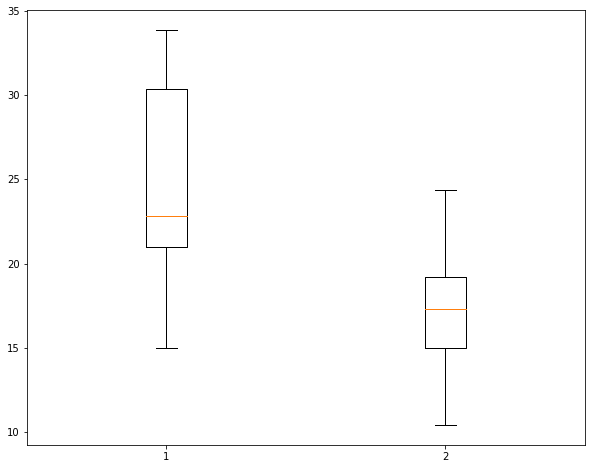

In [ ]:
fig = plt.figure(figsize=(10,8))

plt.boxplot(
    pd.Series([mtcars.loc[lambda df: df.am == "manual"].mpg, mtcars.loc[lambda df: df.am == "automatic"].mpg], index=["manual", "automatic"])#[mtcars.loc[lambda df: df.am == "manual"].mpg, mtcars.loc[lambda df: df.am == "automatic"].mpg]
);

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>
<a id="section4.6"></a>

### Pie

Se construyen mediante la función `pyplot.pie()`. No son muy recomendados (se prefieren los gráficos de barras) pero han sido ampliamente utilizados para comparar proporciones entre los valores de una variable.

Se pueden consultar diferentes parámetros en la [documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html). Permiten manejar multitud de aspectos, como los colores (`colors`), el modo enque se muestra la información (`autopct`), si se destaca algún sector y cuanto (`explode`), etc.

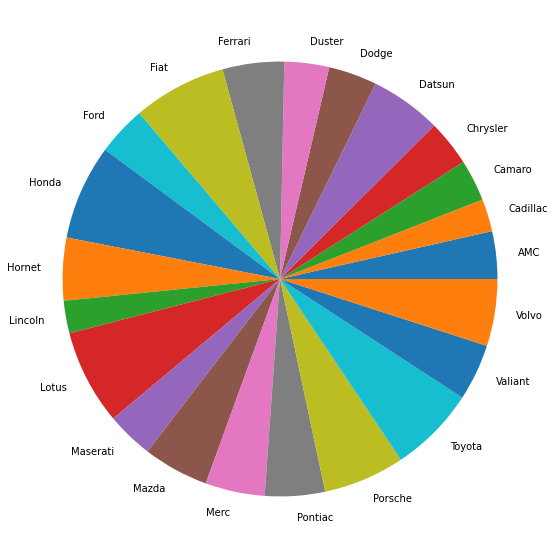

In [ ]:
df = mtcars.groupby("brand").mean()

fig = plt.figure(figsize=(10,10))
plt.pie(df.mpg, labels=df.index);

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>
<a id="section4.7"></a>

### Text

Se puede añador texto en una gráfica mediante `pyplot.text()`. Los dos primeros parámetros constituyen el punto de referencia. Los parámetros `horizontalalignment` y `verticalalignment` determinan cómo debe ser la alineación del texto con respecto a este punto.

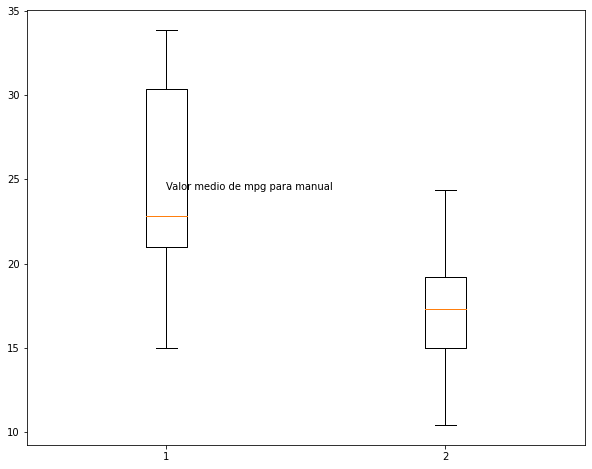

In [ ]:
fig = plt.figure(figsize=(10, 8))

plt.boxplot(
    [mtcars.loc[lambda df: df.am == "manual"].mpg, mtcars.loc[lambda df: df.am == "automatic"].mpg]
)
posx = 1
posy = mtcars.loc[lambda df: df.am == "manual"].mpg.mean()
plt.text(posx, posy, "Valor medio de mpg para manual", horizontalalignment="left");

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>
<a id="section4.8"></a>

### Annotate

Cuando se utilizan flechas y texto para hacer una anotación, se puede hacer directamente con la función `pyplot.annotate`. Ésta toma como parámetros las coordenadas de la punta de la flecha y el texto. En ambos casos, se puede especificar qué unidades se utilizan (en el ejemplo los datos). También las propiedades de la flecha.

Se puede consultar la parametrización en la [documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html).

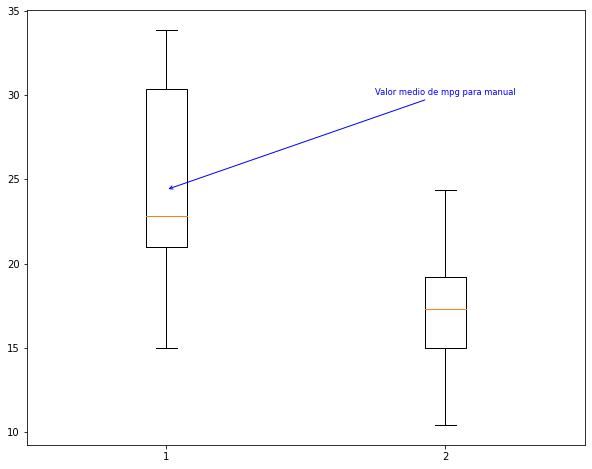

In [ ]:
fig = plt.figure(figsize=(10, 8))

plt.boxplot(
    [mtcars.loc[lambda df: df.am == "manual"].mpg, mtcars.loc[lambda df: df.am == "automatic"].mpg]
)
posx = 1
posy = mtcars.loc[lambda df: df.am == "manual"].mpg.mean()
plt.annotate(
    "Valor medio de mpg para manual",
    xy=(posx, posy),
    xytext=(2, 30),
    horizontalalignment="center",
    textcoords = 'data', 
    arrowprops = dict(arrowstyle="->", color='b'), fontsize='small', color='b'
);

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>
<a id="section4.9"></a>

### hlines y vlines

También se pueden dibujar líneas verticales y horizontales, con las coordenadas en el eje X e Y respectivamente. Adicionalmente hay que especificar el alto o ancho de la línea indicando el (ymin, ymax) o el (xmin, xmax).

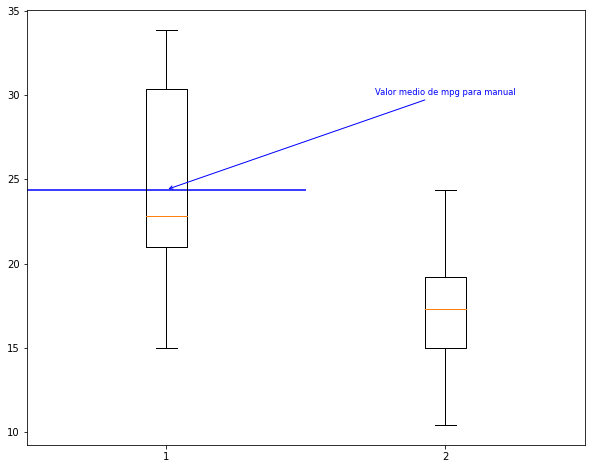

In [ ]:
fig = plt.figure(figsize=(10, 8))

plt.boxplot(
    [mtcars.loc[lambda df: df.am == "manual"].mpg, mtcars.loc[lambda df: df.am == "automatic"].mpg]
)
posx = 1
posy = mtcars.loc[lambda df: df.am == "manual"].mpg.mean()
plt.annotate(
    "Valor medio de mpg para manual",
    xy=(posx, posy),
    xytext=(2, 30),
    horizontalalignment="center",
    textcoords = 'data', 
    arrowprops = dict(arrowstyle="->", color='b'), fontsize='small', color='b'
)
plt.hlines(posy, 0.5, 1.5, color="blue");

---

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>
<a id="section5"></a>

## Títulos y etiquetas

Los títulos principal y secundario se añaden, respectivamente,  mediante las funciones `pyplot.title()` y `pyplot.suptitle()`. Las etiquetas de los ejes, mediante las funciones `pyplot.xlabel()` e `pyplot.ylabel()`.

Tanto las funciones _title_ como _xlabel_ y _ylabel_ aceptan argumentos de tipo [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text).

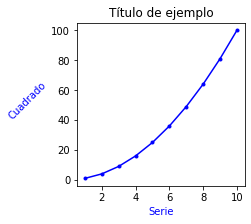

In [ ]:
# Construimos los datos
x_data = [1,2,3,4,5,6,7,8,9,10]
y_data = [x ** 2 for x in x_data]

# Y creamos la figura
fig = plt.figure(figsize=(3,3))
plt.plot(x_data, y_data, ".-b")

# Añade el título 
plt.title("Título de ejemplo", fontsize="large")

# Añade las etiquetas de los ejes
plt.xlabel("Serie", color='blue')
plt.ylabel("Cuadrado", color='blue', rotation=45, labelpad=20);

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>
<a id="section6"></a>

## Ejes

Es posible establecer el rango de cada eje con las funciones `pyplot.xlim()` e `pyplot.ylim()`. Es posible indicar los rangos de mayor a menor valor, cambiando así el aspecto de la gráfica. 

También se pueden determinar los puntos concretos que se muestran en cada eje, su aspecto, mediante `pyplot.xticks()` y `pyplot.yticks()`. 

Al igual que los títulos y las etiquetas, _xticks_ y _yticks_ aceptan argumentos de tipo [Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text).

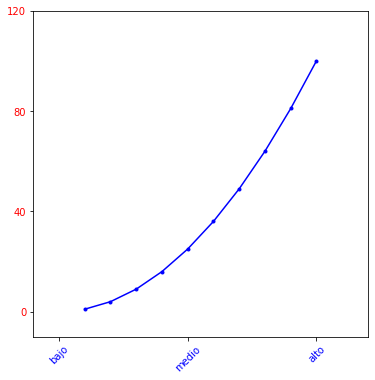

In [ ]:
# Construimos los datos
x_data = [1,2,3,4,5,6,7,8,9,10]
y_data = [x ** 2 for x in x_data]

# Y creamos la figura
fig = plt.figure(figsize=(6, 6))
plt.plot(x_data, y_data, ".-b")

# Cambiamos los limites de los ejes x e y
plt.xlim(-1, 12)
plt.ylim(-10, 120)

# Cambia los ticks de los ejes x e y
plt.xticks([0, 5, 10], ['bajo', 'medio', 'alto'], color = 'blue', rotation=45)
size = 'small',
# cuando los ticks y sus labels coinciden, no es necesario especificar ambos
plt.yticks([0, 40, 80, 120], color = 'red');

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>
<a id="section7"></a>

## Leyenda

En los gráficos, además, se pueden incluir leyendas.  Esto se hace automáticamente añadiendo una etiqueta a cada serie (argumento `label="string"`), y luego invocando `pyplot.legend()` con los parámetros correspondientes. Uno de ellos, `loc`, determina dónde se coloca la leyenda. Si se asigna el valor `best` la leyenda se coloca automáticamente, y puede cambiar de ubicación al añadir o borrar elementos. 


Información con respecto a leyendas puede encontrarse [aquí](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend). Para leyendas más complejas puede consultarse esta [guía](http://matplotlib.org/users/legend_guide.html).

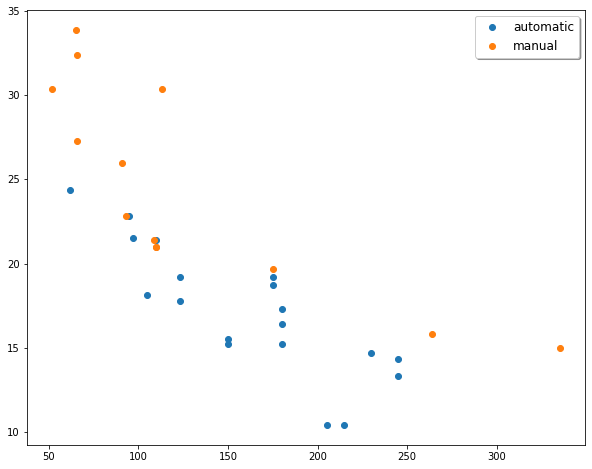

In [ ]:
fig = plt.figure(figsize=(10,8))

for c in mtcars.am.cat.categories:
    df = mtcars.loc[lambda df: df.am == c]
    plt.plot(df.hp, df.mpg, 'o', label=c)

    # Establece la leyenda en la gráfica. La localiza automáticamente. 
plt.legend(loc='best', fontsize='large', shadow=True);

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>
<a id="section8"></a>

## Estilos

Hasta el momento, todas las gráficas se han hecho con el aspecto por defecto. Sin embargo, el método `style` de `plt` permite cambiar la aparencia de las gráficas, en muchos casos para adaptarlas al contexto (presentación, artículo, notebook, etc). Existe una gran variedad de estilos disponibles, que pueden consultarse en el objeto `pyplot.style.available`.

Adicionalmente, existe un estilo llamado `default` que deja el estilo por defecto.

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

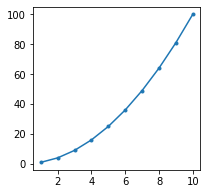

In [ ]:
# se pueden combinar estilos
#plt.style.use('ggplot')
# Construimos los datos
x_data = [1,2,3,4,5,6,7,8,9,10]
y_data = [x ** 2 for x in x_data]

# Y creamos la figura
fig = plt.figure(figsize=(3,3))
plt.plot(x_data, y_data, ".-");

In [ ]:
# asi dejamos el estilo por defecto
plt.style.use('default')

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#000000"></i></font></a>
</div>
<a id="section9"></a>

## Múltiples gráficos en una figura

Como mencionamos al principio de la clase, los gráficos se incluyen en un objeto o capa _axes_. Una figura contiene uno o varios elementos de tipo _axes_.

Para crear una figura con múltiples figuras, disponemos de la función `plt.subplots()`. Ésta admite varios parámetros para controlar la distribución y aspecto de las figuras. Las más importantes son:
- `nrows` y `ncols`: crea una matriz de subplots (axes), distribuidos en ese número de filas y columnas.
- `shareX` y `shareY`: controla el aspecto del eje x e y de los subplots. Si es True, todos los suplots comparten el mismo dominio del eje X e Y respectivamente. Si no, cada uno será independiente.

Puede encontrarse más información sobre el manejo de esta función [aquí](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html).

In [ ]:
import numpy as np

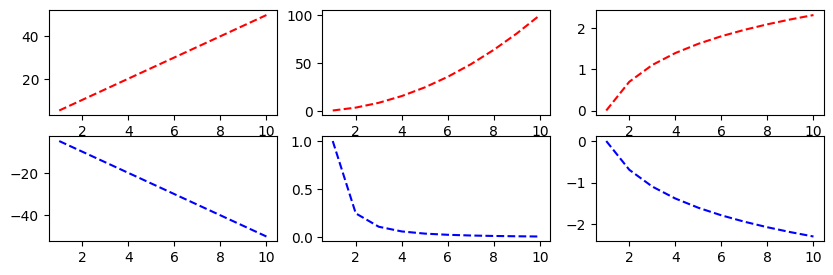

In [ ]:
# Construimos los datos
x_data = [1,2,3,4,5,6,7,8,9,10]

y11_data = [x * 5 for x in x_data]
y12_data = [x ** 2 for x in x_data]
y13_data = [np.log(x) for x in x_data]

y21_data = [x * -5 for x in x_data]
y22_data = [x ** -2 for x in x_data]
y23_data = [np.log(1/x) for x in x_data]


# Y creamos la figura
fig, axes_grid = plt.subplots(2, 3, figsize=(10,3), sharey=False)

axes_grid[0, 0].plot(x_data, y11_data, "--r")
axes_grid[0, 1].plot(x_data, y12_data, "--r")
axes_grid[0, 2].plot(x_data, y13_data, "--r")

axes_grid[1, 0].plot(x_data, y21_data, "--b")
axes_grid[1, 1].plot(x_data, y22_data, "--b")
axes_grid[1, 2].plot(x_data, y23_data, "--b");